In [13]:
import tensorflow.keras.utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, Input, Lambda
from tensorflow.keras import backend as K
import tensorflow_addons
import tensorflow_datasets as tfds
import math

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

WEIGHTS_TRAINED_DIR = 'model_weights/trained'
RESULT_PLOTS_DIR = 'plots'

import numpy as np
import random

def square_activation(x):
    return K.square(x)

In [2]:
!pip3 install keras-facenet

In [3]:
# def save_model_history(history, file_name):
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']

#     epochs_range = range(len(loss))

#     plt.figure(figsize=(7, 7))

#     plt.subplot(2, 1, 2)
#     plt.plot(epochs_range, loss, label='Training Loss')
#     plt.plot(epochs_range, val_loss, label='Validation Loss')
#     plt.legend(loc='upper right')
#     plt.title('Training and Validation Loss')

#     if 'accuracy' in history.history:
#         acc = history.history['accuracy']
#         val_acc = history.history['val_accuracy']

#         plt.subplot(2, 1, 1)
#         plt.plot(epochs_range, acc, label='Training Accuracy')
#         plt.plot(epochs_range, val_acc, label='Validation Accuracy')
#         plt.legend(loc='lower right')
#         plt.title('Training and Validation Accuracy')

#     file_pointer = os.path.join(RESULT_PLOTS_DIR, file_name + '.png')
#     plt.savefig(file_pointer)
#     plt.clf()

    
# class ModelBase:
#     def __init__(self, name):
#         self.name = name
#         self.model = self.init_model()
#         self.compile_model()

#     def init_model(self):
#         raise NotImplementedError('Must be implemented by derived class')

#     def compile_model(self):
#         raise NotImplementedError('Must be implemented by derived class')

#     def get_model(self):
#         return self.model

#     def train_model(self, generator, generator_val, epochs):
#         history = self.model.fit_generator(
#             generator=generator,
#             validation_data=generator_val,
#             epochs=epochs
#         )

#     def train_model_ds(self, ds, epochs, batch_size):
#         history = self.model.fit(
#             ds,
#             epochs=epochs,
#             batch_size=batch_size
#         )
#         #save_model_history(history, self.name)

In [4]:
# TRIPLE_LOSS_MARGIN = 1.5
# TRIPLE_LOSS_ENCODE_SIZE = 64

# def pos_recall(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     recall = true_positives / (possible_positives + K.epsilon())
#     return recall

# def neg_recall(y_true, y_pred):
#     y_true = y_true * -1 + 1
#     y_pred = y_pred * -1 + 1
#     true_negatives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_negatives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     recall = true_negatives / (possible_negatives + K.epsilon())
#     return recall

# class ModelSemiHardTripletLoss(ModelBase):
#     def __init__(self, name, in_shape):
#         self.in_shape = in_shape
#         self.encode_length = TRIPLE_LOSS_ENCODE_SIZE
#         self.fc_model = None
#         super().__init__(name)

#     def init_model(self):
#         model = Sequential()
#         model.add(Conv2D(32, (3, 3), strides=2, input_shape=self.in_shape))
#         model.add(Activation(square_activation))
#         model.add(Conv2D(64, (3, 3), strides=2))
#         model.add(Flatten())
#         model.add(Dense(self.encode_length))

#         model.add(Lambda(lambda tensor: tensorflow.math.l2_normalize(tensor, axis=1)))

#         return model

#     def compile_model(self):
#         self.model.compile(
#             optimizer=tensorflow.keras.optimizers.Adam(lr=0.003),
#             loss=tensorflow_addons.losses.TripletSemiHardLoss(margin=TRIPLE_LOSS_MARGIN),
#         )

In [5]:
# class ModelSiamese(ModelBase):
#     def __init__(self, name, encoder, img_dim):
#         self.in_shape = (2 * img_dim, img_dim, 3)
#         self.encoder = encoder
#         self.img_dim = img_dim
#         super().__init__(name)

#     def init_model(self):
#         input_layer = Input(shape=self.in_shape)

#         slice_layer_1 = Lambda(lambda x: x[:, 0:self.img_dim])
#         slice_layer_2 = Lambda(lambda x: x[:, self.img_dim:2 * self.img_dim])

#         left_input = slice_layer_1(input_layer)
#         right_input = slice_layer_2(input_layer)
        
#         square = Lambda(lambda x: K.square(x)) 

#         encoded_l = self.encoder(left_input)
#         encoded_r = self.encoder(right_input)
        
#         #l1_layer = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))
#         concat = Lambda(lambda tensors: tf.keras.layers.Concatenate()(tensors))

#         l1_distance = concat([encoded_l, encoded_r])

#         fc_model = Dense(256)(l1_distance)
#         fc_model = Activation(square_activation)(fc_model)
#         fc_model = Dense(64)(l1_distance)
#         fc_model = Activation(square_activation)(fc_model)
#         fc_model = Dense(1)(fc_model)
#         fc_model = Activation('sigmoid')(fc_model)

#         return Model(inputs=[input_layer], outputs=fc_model)

#     def compile_model(self):
#         self.model.compile(
#             optimizer=tensorflow.keras.optimizers.Adam(lr=0.001),
#             loss='binary_crossentropy',
#             metrics=['accuracy', pos_recall, neg_recall],
#         )


In [6]:
# import os 
# from PIL import Image
# import matplotlib.pyplot as plt
# import copy
# import numpy as np
# import random

# from keras_vggface.vggface import VGGFace
# vggface = VGGFace(model='vgg16')

# def load_faces(path):
#     paths = []
#     labels = []
#     data = []
#     encodings_all = []
    
#     for dir_, _, _ in os.walk(path):        
#         for filename in os.listdir(dir_):
#             if filename.split('.')[-1] != 'jpg':
#                 continue
#             path = dir_ + '/' + filename
#             identity = int(filename.split('_')[0])
#             labels.append(identity)
            
#             img = Image.open(path)
#             img_r = img.resize((224, 224), Image.ANTIALIAS)
#             data.append(np.array(img_r.getdata()).reshape((224, 224, 3)))
#             img.close()   
            
#             if len(data) == 64:
#                 data = np.array(data)
#                 encodings = vggface(data)
#                 data = []
#                 encodings_all.extend(list(encodings.numpy()))
                
#                 print(len(labels))
                
#     return np.array(encodings_all), np.array(labels)

In [14]:
# encodings, labels = load_faces('tinyface/Training_Set/')

In [15]:
# encodings_test, labels_test = load_faces('tinyface/Testing_Set/Gallery_Match')

In [28]:
# np.save('embeddings/tinyface_train', encodings)
# np.save('embeddings/tinyface_test', encodings_test)

In [16]:
# class DataGenerator(tensorflow.keras.utils.Sequence):
#     def __init__(self, batch_size, images, labels):
#         self.batch_size = batch_size
#         self.images = images
#         self.labels = labels

#     def __len__(self):
#         return math.ceil(self.size() / self.batch_size)

#     def __getitem__(self, index):
#         slice_range = [index * self.batch_size, min((index + 1) * self.batch_size, self.size())]

#         image_paths = self.images[slice(*slice_range)]
#         labels = self.labels[slice(*slice_range)]
        
#         ims = []
#         for path in image_paths:
#             im = load_face(path)
#             ims.append(im)

#         return np.array(ims), labels
    
#     def on_epoch_end(self):
#         batches_ok = False

#         while not batches_ok:
#             indices = np.arange(self.images.shape[0])
#             np.random.shuffle(indices)
#             self.images = self.images[indices]
#             self.labels = self.labels[indices]
            
#             batches_ok = True
            
#             for index in range(self.__len__()):
#                 ims, labs = self.__getitem__(index)
#                 if len(np.unique(labs)) == len(labs):
#                     batches_ok = False
#                     break

#     def size(self):
#         return len(self.labels)
    
    
# class DataGeneratorSiamese(tensorflow.keras.utils.Sequence):
#     def __init__(self, batch_size, images, labs):
#         self.batch_size = batch_size        
#         total = len(labs)
        
#         self.pairs = []
#         self.labels = []
        
#         memory = set()
        
#         for l in [0, 1]:
#             for _ in range(10000):
#                 while True:
#                     index_a = random.randint(0, total - 1)
#                     index_b = random.randint(0, total - 1)

#                     if (labs[index_a] != labs[index_b]) != l:
#                         continue
#                     if index_a == index_b or (index_a, index_b) in memory:
#                         continue
                    
#                     memory.add((index_a, index_b))
#                     self.pairs.append([index_a, index_b])
#                     self.labels.append(l)
#                     break
                    
#         self.pairs = np.array(self.pairs)
#         self.labels = np.array(self.labels)
#         self.images = images
        

#     def __len__(self):
#         return math.ceil(self.size() / self.batch_size)

#     def __getitem__(self, index):
#         slice_range = [index * self.batch_size, min((index + 1) * self.batch_size, self.size())]

#         pairs = self.pairs[slice(*slice_range)]
#         labels = self.labels[slice(*slice_range)]
        
#         image_pairs = []
        
#         for p in pairs:
#             im_1 = self.images[p[0]]
#             im_2 = self.images[p[1]]
                        
#             image_pair = np.concatenate((im_1, im_2))
#             image_pairs.append(image_pair)

#         return np.array(image_pairs), labels
    
#     def on_epoch_end(self):
#         batches_ok = False

#         indices = np.arange(self.pairs.shape[0])
#         np.random.shuffle(indices)
#         self.pairs = self.pairs[indices]
#         self.labels = self.labels[indices]
        
#     def size(self):
#         return len(self.labels)

In [51]:
# labels_test = labels_test[:4000]
# encodings_test = encodings_test[:4000]

# labels = labels[:7000]
# encodings = encodings[:7000]

# dg_test1 = DataGenerator(32, encodings_test, labels_test)
# dg_train1 = DataGenerator(32, encodings, labels)

In [56]:
# dg_test2 = DataGeneratorSiamese(32, encodings_test, labels_test)
# dg_train2 = DataGeneratorSiamese(32, encodings, labels)

In [ ]:
# img_dim = 32
# model_triplet_loss = ModelSemiHardTripletLoss(name='tiny_face_encoder', in_shape=(img_dim, img_dim, 3))
# model_triplet_loss.train_model(dg_train1, dg_test1, 32)

In [17]:
# model_triplet_loss.model.summary()

In [18]:
# model_triplet_loss.model.save('saved_model/triplet')

In [459]:
# indices = []
# for i, lab in enumerate(dg.labels):
#     if lab in range(5):
#         indices.append(i)
        
# embeddings = model_triplet_loss.model(dg.images)
# labels = dg.labels

# embeddings = [embeddings[i] for i in indices]
# labels = [labels[i] for i in indices]

# embeddings = np.array(embeddings)
# labels = np.array(labels)

In [216]:
# np.savetxt("embeddings/vecs.tsv", embeddings, delimiter='\t')

In [217]:
# import io
# out_m = io.open('embeddings/meta.tsv', 'w', encoding='utf-8')
# [out_m.write(str(l) + "\n") for l in labels]
# out_m.close()

In [466]:
# encoder = Sequential(model_triplet_loss.model.layers)

# for layer in encoder.layers[:]:
#     layer.trainable = False
    
# model_siamese = ModelSiamese(name='tiny_face_distinguisher', encoder=encoder, img_dim=img_dim)

In [19]:
# model_siamese.train_model(dg_train2, dg_test2, 1000)

In [3]:
from keras_vggface.vggface import VGGFace
vggface = VGGFace(include_top=False, input_shape=(224, 224, 3), pooling='avg')

vggface.summary()


Model: "vggface_vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)     

In [7]:
class DataGenerator(tensorflow.keras.utils.Sequence):
    def __init__(self, batch_size, images, labels):
        self.batch_size = batch_size
        self.images = images
        self.labels = labels
        self.on_epoch_end()

    def __len__(self):
        return math.ceil(self.size() / self.batch_size)

    def __getitem__(self, index):
        slice_range = [index * self.batch_size, min((index + 1) * self.batch_size, self.size())]

        embeddings = self.images[slice(*slice_range)]
        labels = self.labels[slice(*slice_range)]
        
        ims = []
        for e in embeddings:
            ims.append(e)

        return np.array(ims), labels
    
    def on_epoch_end(self):
        batches_ok = False

        while not batches_ok:
            indices = np.arange(self.images.shape[0])
            np.random.shuffle(indices)
            self.images = self.images[indices]
            self.labels = self.labels[indices]
            
            batches_ok = True
            
            for index in range(self.__len__()):
                ims, labs = self.__getitem__(index)
                if len(np.unique(labs)) == len(labs):
                    batches_ok = False
                    break

    def size(self):
        return len(self.labels)
    
    
class DataGeneratorSiamese(tensorflow.keras.utils.Sequence):
    def __init__(self, batch_size, images, labs):
        self.batch_size = batch_size        
        total = len(labs)
        
        self.pairs = []
        self.labels = []
        
        memory = set()
        
        for l in [0, 1]:
            for _ in range(10000):
                while True:
                    index_a = random.randint(0, total - 1)
                    index_b = random.randint(0, total - 1)

                    if (labs[index_a] != labs[index_b]) != l:
                        continue
                    if index_a == index_b or (index_a, index_b) in memory:
                        continue
                    
                    memory.add((index_a, index_b))
                    self.pairs.append([index_a, index_b])
                    self.labels.append(l)
                    break
                    
        self.pairs = np.array(self.pairs)
        self.labels = np.array(self.labels)
        self.images = images
        

    def __len__(self):
        return math.ceil(self.size() / self.batch_size)

    def __getitem__(self, index):
        slice_range = [index * self.batch_size, min((index + 1) * self.batch_size, self.size())]

        pairs = self.pairs[slice(*slice_range)]
        labels = self.labels[slice(*slice_range)]
        
        image_pairs = []
        
        for p in pairs:
            im_1 = self.images[p[0]]
            im_2 = self.images[p[1]]
                        
            image_pair = np.concatenate((im_1, im_2))
            image_pairs.append(image_pair)

        return np.array(image_pairs), labels
    
    def on_epoch_end(self):
        batches_ok = False

        indices = np.arange(self.pairs.shape[0])
        np.random.shuffle(indices)
        self.pairs = self.pairs[indices]
        self.labels = self.labels[indices]
        
    def size(self):
        return len(self.labels)

In [8]:
import io
id_file = open('celebA/ids.txt', 'r')
s = id_file.read()
s = s.split('\n')

d = {}
c = 0

for l in s:
    if len(l.split(' ')) != 2:
        break
    face_id = int(l.split(' ')[1])
    
    if face_id not in d:
        d[face_id] = []
        
    name = l.split(' ')[0]
    name = name.split('.')[0] + '.png'
    
    d[face_id].append('celebA/img_align_celeba_png/' + name)
    
    
ids = [i for i in range(1, 1000)]
np.sum([len(d[i]) for i in ids])


21144

In [99]:
def load_faces():
    labels = []
    encodings_all = []
    data = []
    
    for face_id in ids:
        for path in d[face_id]:
            labels.append(face_id)

            img = Image.open(path)
            img_r = img.resize((224, 224), Image.ANTIALIAS)
            data.append(np.array(img_r.getdata()).reshape((224, 224, 3)))
            img.close()   
            
            if len(data) == 64:
                data = np.array(data)
                encodings = vggface(data)
                data = []
                encodings_all.extend(list(encodings.numpy()))
                
                print(len(labels))
            
    return np.array(encodings_all), np.array(labels)

celeb_embeddings, celeb_labels = load_faces()

64
128
192
256
320
384
448
512
576
640
704
768
832
896
960
1024
1088
1152
1216
1280
1344
1408
1472
1536
1600
1664
1728
1792
1856
1920
1984
2048
2112
2176
2240
2304
2368
2432
2496
2560
2624
2688
2752
2816
2880
2944
3008
3072
3136
3200
3264
3328
3392
3456
3520
3584
3648
3712
3776
3840
3904
3968
4032
4096
4160
4224
4288
4352
4416
4480
4544
4608
4672
4736
4800
4864
4928
4992
5056
5120
5184
5248
5312
5376
5440
5504
5568
5632
5696
5760
5824
5888
5952
6016
6080
6144
6208
6272
6336
6400
6464
6528
6592
6656
6720
6784
6848
6912
6976
7040
7104
7168
7232
7296
7360
7424
7488
7552
7616
7680
7744
7808
7872
7936
8000
8064
8128
8192
8256
8320
8384
8448
8512
8576
8640
8704
8768
8832
8896
8960
9024
9088
9152
9216
9280
9344
9408
9472
9536
9600
9664
9728
9792
9856
9920
9984
10048
10112
10176
10240
10304
10368
10432
10496
10560
10624
10688
10752
10816
10880
10944
11008
11072
11136
11200
11264
11328
11392
11456
11520
11584
11648
11712
11776
11840
11904
11968
12032
12096
12160
12224
12288
12352
12416
12480
12

In [9]:
celeb_embeddings = np.load('embeddings/celeb_20k.npy')
celeb_labels = np.load('embeddings/celeb_20k_labs.npy')

In [20]:
embeddings_train = []
labels_train = []

embeddings_test = []
labels_test = []

train_ids = np.arange(0, 500)
test_ids = np.arange(500, 1000)

for i, face in enumerate(celeb_embeddings):
    if celeb_labels[i] in train_ids:
        embeddings_train.append(celeb_embeddings[i])
        labels_train.append(celeb_labels[i])
    if celeb_labels[i] in test_ids:
        embeddings_test.append(celeb_embeddings[i])
        labels_test.append(celeb_labels[i])
    
embeddings_train = np.array(embeddings_train)
embeddings_test = np.array(embeddings_test)
labels_train = np.array(labels_train)
labels_test = np.array(labels_test)

print(embeddings_train.shape)

(10910, 512)


In [21]:
dg_train = DataGenerator(256, embeddings_train, labels_train)
dg_test = DataGenerator(256, embeddings_test, labels_test)

In [22]:
dg_train_siamese = DataGeneratorSiamese(32, embeddings_train, labels_train)
dg_test_siamese = DataGeneratorSiamese(32, embeddings_test, labels_test)

In [23]:
model_encoder = Sequential()
model_encoder.add(Dense(64, input_shape=(512,)))
model_encoder.add(Activation(square_activation))
model_encoder.add(Lambda(lambda tensor: tensorflow.math.l2_normalize(tensor, axis=1)))

model_encoder.compile(
    optimizer=tensorflow.keras.optimizers.Adam(lr=0.003),
    loss=tensorflow_addons.losses.TripletSemiHardLoss(margin=0.5),
)

In [24]:
model_encoder.fit_generator(
            generator=dg_train,
            validation_data=dg_test,
            epochs=50
)

/home/han/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
43/43 [==============================] - 2s 12ms/step - loss: 0.4816 - val_loss: 0.4672
Epoch 2/50
43/43 [==============================] - 1s 12ms/step - loss: 0.4571 - val_loss: 0.4549
Epoch 3/50
43/43 [==============================] - 0s 12ms/step - loss: 0.4418 - val_loss: 0.4505
Epoch 4/50
43/43 [==============================] - 0s 11ms/step - loss: 0.4291 - val_loss: 0.4467
Epoch 5/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4240 - val_loss: 0.4453
Epoch 6/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4186 - val_loss: 0.4420
Epoch 7/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4042 - val_loss: 0.4446
Epoch 8/50
43/43 [==============================] - 0s 10ms/step - loss: 0.3986 - val_loss: 0.4426
Epoch 9/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4022 - val_loss: 0.4401
Epoch 10/50
43/43 [==============================] - 0s 10ms/step - loss: 0.3865 - val_loss: 0.4399
Epoch 11/

In [25]:
for layer in model_encoder.layers[:]:
    layer.trainable = False

In [106]:
input_layer = Input(shape=(512 * 2,))

slice_layer_1 = Lambda(lambda x: x[:, 0:512])
slice_layer_2 = Lambda(lambda x: x[:, 512:2 * 512])

left_input = slice_layer_1(input_layer)
right_input = slice_layer_2(input_layer)

square = Lambda(lambda x: K.square(x)) 

encoded_l = model_encoder(left_input)
encoded_r = model_encoder(right_input)

l1_layer = Lambda(lambda tensors: K.square(tensors[0] - tensors[1]))
l1_distance = l1_layer([encoded_l, encoded_r])

fc_model = Dense(64)(l1_distance)
fc_model = Activation(square_activation)(fc_model)
fc_model = Dense(1)(fc_model)
fc_model = Activation('sigmoid')(fc_model)

In [107]:
fc_model = Model(inputs=[input_layer], outputs=fc_model)

def pos_recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def neg_recall(y_true, y_pred):
    y_true = y_true * -1 + 1
    y_pred = y_pred * -1 + 1

    true_negatives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_negatives / (possible_negatives + K.epsilon())
    return recall

fc_model.compile(
    optimizer=tensorflow.keras.optimizers.Adam(lr=0.003),
    loss='binary_crossentropy',
    metrics=['accuracy', pos_recall, neg_recall],
)

In [108]:
fc_model.fit_generator(
            generator=dg_train_siamese,
            validation_data=dg_test_siamese,
            epochs=1
)

625/625 [==============================] - 2s 2ms/step - loss: 0.3837 - accuracy: 0.7734 - pos_recall: 0.9633 - neg_recall: 0.5859 - val_loss: 0.3369 - val_accuracy: 0.8609 - val_pos_recall: 0.8967 - val_neg_recall: 0.8263


In [109]:
fc_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 1024)]       0                                            
__________________________________________________________________________________________________
lambda_24 (Lambda)              (None, 512)          0           input_8[0][0]                    
__________________________________________________________________________________________________
lambda_25 (Lambda)              (None, 512)          0           input_8[0][0]                    
__________________________________________________________________________________________________
sequential (Sequential)         (None, 64)           32832       lambda_24[0][0]                  
                                                                 lambda_25[0][0]            

In [111]:
fc_model.evaluate(dg_test_siamese)

625/625 [==============================] - 1s 1ms/step - loss: 0.3369 - accuracy: 0.8609 - pos_recall: 0.8969 - neg_recall: 0.8253


[0.3369109332561493,
 0.8608999848365784,
 0.8969108462333679,
 0.8253464698791504]

In [143]:
from tqdm.notebook import tqdm

x = 0.5 + np.arange(-100, 101) / 200
print(x)

    

[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3   0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355
 0.36  0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415
 0.42  0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475
 0.48  0.485 0.49  0.495 0.5   0.505 0.51  0.515 0.52  0.525 0.53  0.535
 0.54  0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595
 0.6   0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655
 0.66  0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71  0.715
 0.72  0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77  0.775
 0.78  0.785 0.79  0.795 0.8   0.805 0.81  0.815 0.

In [126]:
def true_positive(preds, labels):
    mask = np.argwhere(labels == 1)
    return np.sum(preds[mask]) / len(labels[mask])
    
def false_positive(preds, labels):
    mask = np.argwhere(labels == 0)
    return np.sum(preds[mask]) / len(labels[mask])

In [144]:
tps = []
fps = []

for thresh in tqdm(x):
    preds = []
    trues = []
    
    for i in range(50):
        pairs, labels = dg_test_siamese.__getitem__(i)
        if labels.shape == (0,):
            continue
        outputs = fc_model(pairs)
        outputs = outputs >= thresh
        preds.extend(outputs[:, 0])
        trues.extend(labels)
            
    tps.append(true_positive(np.array(preds), np.array(trues)))
    fps.append(false_positive(np.array(preds), np.array(trues)))
    

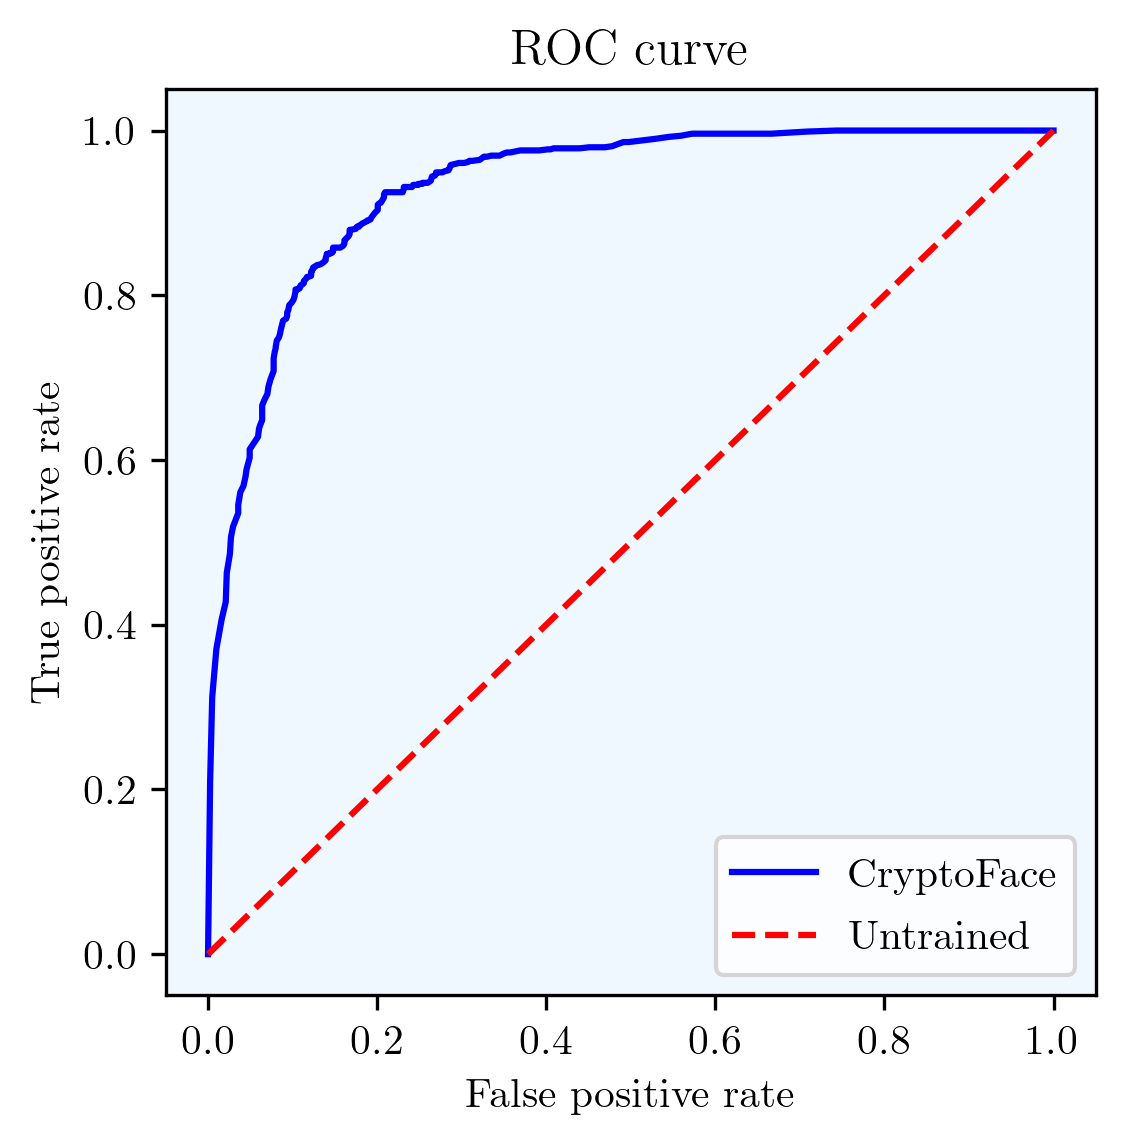

In [169]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 's'
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['figure.dpi'] = 300

m = np.arange(101) / 100

plt.figure(figsize=(4,4))
plt.plot(fps, tps, label='CryptoFace', color='b')
plt.plot(m, m, '--', label='Untrained', color='r')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.gca().set_facecolor('aliceblue')
plt.legend()
plt.title('ROC curve')

plt.savefig('plots/roc.pdf', format='pdf', bbox_inches = "tight")